# Lab 6

In [329]:
import random
import numpy as np
import matplotlib.pyplot as plt

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [284]:
class main:
    SILENT=6
    DEBUG=1
    INFO=2
    ERROR=4

    def __init__(self,level=0):
        self.level = level
    
    def message(self, level, *args):
        if level >= self.level:
            print(*args)
        

class Card(main):
    Values = [2,3,4,5,6,7,8,9,10] + ["J","Q","K","A"]
    Suits = ["Spades","Clubs","Hearts","Diamond"]
    
    def __init__(self,suit,value=None):
        main.__init__(self)
        self.suit= suit if suit in self.Suits else None
        self.value = value if value in self.Values else None
    
    def display_card(self):
        if self.suit and self.value:
            print(f"{self.value} of {self.suit}")

    def point_value(self):
        if self.value == "A":
            pointValue = 1
        elif self.value in ["J", "Q", "K"]:
            pointValue = 10
        elif isinstance(self.value, int) and 2 <= self.value <= 10:  
            pointValue = self.value
        else:
            pointValue = 0  
        return pointValue

    def shuffleCard(self):
        return self.suit == "ShuffleCard"
        
    def __str__(self):
        if self.shuffleCard():
            return "Shuffle Card"
        else:
            return (f"{self.value} of {self.suit}")
    __repr__ = __str__

class Deck(main):
    Values = [2,3,4,5,6,7,8,9,10] + ["J","Q","K","A"]
    Suits = ["Spades","Clubs","Hearts","Diamond"]

    def __init__(self, deck_amount=6):
        main.__init__(self)
        self.deck_amount = deck_amount

        self.cards = list()

        for _ in range(self.deck_amount):
            self.cards.extend(self.create_deck())

        self.cards.append(Card("ShuffleCard"))


    def create_deck(self):
        deck = list() 
        for suit in self.Suits:
            for value in self.Values:
                deck.append(Card(suit, value))
        return deck

    def shuffle(self):
        random.shuffle(self.cards)

    def deal(self):
        if len(self.cards) > 0:
            return self.cards.pop()
        else:
            for _ in range(self.deck_amount): 
                self.cards.extend(self.create_deck())
            self.shuffle()
            return self.cards.pop()


In [286]:
test_card = Card("Spades",8)
test_card.display_card()
test_card.point_value()

8 of Spades


8

In [288]:
test_deck = Deck()

test_deck.shuffle()

[test_deck.deal() for i in range(10)]


[J of Hearts,
 4 of Hearts,
 K of Diamond,
 4 of Hearts,
 K of Spades,
 K of Diamond,
 2 of Spades,
 7 of Spades,
 Q of Clubs,
 6 of Clubs]

In [290]:
def hand_value_calc(hand):
    card_values = list(map(lambda card: card.point_value(),hand))

    Aces = len(list(filter(lambda x: x==1, card_values)))

    hand_value = sum(card_values)

    if Aces == 0:
        return hand_value
    One_Ace = hand_value
    Eleven_Ace = hand_value + 10

    if Eleven_Ace <= 21:
        return Eleven_Ace
    else:
        return One_Ace

In [292]:
hand_value_calc([Card("Spades",9),Card("Hearts",3),Card("Diamond","A")])

13

2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [297]:
# players
class Player(main):
    def __init__(self,name, chip_count):
        main.__init__(self)
        self.name = name
        self.chip_count = chip_count

    def get_name(self):
        return self.name

    def chips(self):
        return self.chip_count

    def pay_out(self,value=2):
        self.chip_count+=value 

    def pay_up(self,value=2):
        self.chip_count -= value

    def play_hand(self,down_card,up_card,seen_cards):
        raise NotImplementedError

    def __str__(self):
        return self.name + "("+ str(self.chip_count) + ")"

    __repr__ = __str__

class Dealer(Player):
    def __init__(self,threshold=16):
        self.threshold = threshold
        Player.__init__(self,"Dealer",1000)

    def play_hand(self,down_card,up_card,seen_cards):
        hand_value = hand_value_calc([down_card]+ up_card)
        return hand_value < self.threshold


class selfPlayer(Player):
    def play_hand(self,down_card,up_card,seen_cards):
        print(f"Down Card: {down_card}")
        print(f"Up Cards: {up_card}")
        print(f"Seen Cards: {seen_cards}")
        hit_strat = input("Hit Y or N:")
        return hit_strat.upper()=="Y"


#game 
class Game(main):
    def __init__(self,deck_amount=6,level=1):
        main.__init__(self,level)
        self.deck_amount = deck_amount
        self.players = list()
        self.all_players = list()
        self.shuffle=False

    def get_players(self):
        return self.players

    def get_all_players(self):
        return self.all_players

    def add_player(self,player):
        self.players.append(player)
        self.all_players.append(player)

    def deal_and_maybe_shuffle(self,deck):
        card = deck.deal()
        if card.shuffleCard():
            self.shuffle=True
            card = deck.deal()
        return card

    def show_status(self,hands,seen_cards):
        self.message(self.INFO,"Hands:",hands)
        self.message(self.INFO,"Seen Cards:", seen_cards)
        self.message(self.INFO,"\n\nPlayers:")
        for i,player in enumerate(self.all_players):
            self.message(self.INFO,i,":",player)
        

    def play_game(self, n_hands):
        self.add_player(Dealer())

        deck = None

        for i_hand in range(n_hands):
            self.players = list(filter(lambda player: player.chips()>=2,self.players))
            self.message(self.DEBUG,"n players, n all players",len(self.players),len(self.all_players))
            self.message(self.DEBUG,"Starting Hand:" ,i_hand,"/",n_hands)

        if deck is None or self.shuffle:
            self.message(self.DEBUG,"Making New Deck")
            deck = Deck()
            deck.shuffle()
            seen_cards = list()
            self.shuffle=False

        hands = list()
        self.message(self.DEBUG,"Dealing")
        for player_i,player in enumerate(self.players):
            down_card = self.deal_and_maybe_shuffle(deck)
            up_card = list()
            hands.append((down_card,up_card))
            if player_i < len(self.players)-1:
                seen_cards.append(down_card)
        
        for (down_card, up_card) in hands:
            up_card.append(self.deal_and_maybe_shuffle(deck))
            seen_cards.append(up_card[-1])

        for player_i,((down_card,up_card),player) in enumerate(zip(hands,self.players)):
            self.message(self.DEBUG,"Asking Player: ",player_i," to Play")
            self.message(self.DEBUG, "Player", player_i, "hand total:",hand_value_calc([down_card]+up_card))
            hit = True
            this_hand_up_card = list()
            while(hit):
                hit=player.play_hand(down_card,up_card,seen_cards)

                if hit:
                    self.message(self.DEBUG,"Player",player_i,"Hit")
                    card = self.deal_and_maybe_shuffle(deck)
                    up_card.append(card)
                    this_hand_up_card.append(card)
                    hand_value = hand_value_calc([down_card]+up_card)
                    self.message(self.DEBUG, "Hand Value:",hand_value)
                    if hand_value<21:
                        hit= True
                    else:
                        hit=False
                        if hand_value>21:
                            self.message(self.DEBUG,"Player",player_i,"Busted")
                            self.message(self.DEBUG,"Player",player_i,"21!")
                else:
                    self.message(self.DEBUG, "Player",player_i,"Stay")
                    
            seen_cards.append(down_card)
            seen_cards.extend(this_hand_up_card)

        hand_values = [hand_value_calc([hand[0]]+hand[1]) for hand in hands]

        self.message(self.DEBUG, "Hand Values",hand_values)

        if hand_values[-1]==21:
            self.message(self.DEBUG,"Dealer Got 21")
            for player_i,(hand_value,player) in enumerate(zip(hand_values[:-1],self.players[:-1])):
                if hand_value==21:
                    self.message(self.DEBUG,"Player",player_i,"21! Paying chips")
                    player.pay_out(3)
                else:
                    self.message(self.DEBUG,"Player",player_i,"Busted. Deducting")
                    player.pay_up(2)


        if hand_values[-1] > 21:
            self.message(self.DEBUG, "Dealer Busted")
            for player_i, (hand_value, player) in enumerate(zip(hand_values[:-1], self.players[:-1])):
                if hand_value == 21:
                    self.message(self.DEBUG, "Player", player_i, "21! Paying chips")
                    player.pay_out(3)
                elif hand_value > 21:
                    self.message(self.DEBUG, "Player", player_i, "Busted. No Change")
                else:
                    self.message(self.DEBUG, "Player", player_i, "Wins! Paying chips")
                    player.pay_out(2)


        if hand_values[-1]<21:
            self.message(self.DEBUG, "Player",player_i,"Dealer hadn is:",hand_values[-1])
            for player_i,(hand_value,player) in enumerate(zip(hand_values[:-1],self.players[:-1])):
                if hand_value==21:
                    self.message(self.DEBUG,"Player",player_i,"Got 21. Paying 3 chips.")
                    player.pay_out(3)
                elif hand_value > 21:
                    self.message(self.DEBUG,"Player",player_i,"Busted. Deducting")
                    player.pay_up(2)
                elif hand_value > hand_values[-1]:
                    self.message(self.DEBUG,"Player",player_i," hand was",hand_value,"VS Dealer:",hand_values[-1],"Paying 2 chips.")
                    player.pay_out(3)
                elif hand_value == hand_values[-1]:
                    self.message(self.DEBUG, "Player", player_i, "Tied with Dealer. No Change")
                else:
                    self.message(self.DEBUG,"Player",player_i," hand was",hand_values,"VS Dealer:",hand_values[-1],"Deducting 2 chips.")
                    player.pay_up(2)    

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [300]:
class play_like_the_dealer(Player):
    def __init__(self, name, chips, threshold=16):
        self.threshold = threshold
        Player.__init__(self, name, chips)

    def play_hand(self, down_card, up_card, seen_cards):
        hand_value = hand_value_calc([down_card] + up_card)
        
        return hand_value < self.threshold

In [302]:
test_game = Game()

test_game.add_player(play_like_the_dealer("Guy",100,16))
test_game.add_player(play_like_the_dealer("Pal",100,17))
test_game.add_player(play_like_the_dealer("Buddy",100,15))

test_game.play_game(1000)

n players, n all players 4 4
Starting Hand: 0 / 1000
n players, n all players 4 4
Starting Hand: 1 / 1000
n players, n all players 4 4
Starting Hand: 2 / 1000
n players, n all players 4 4
Starting Hand: 3 / 1000
n players, n all players 4 4
Starting Hand: 4 / 1000
n players, n all players 4 4
Starting Hand: 5 / 1000
n players, n all players 4 4
Starting Hand: 6 / 1000
n players, n all players 4 4
Starting Hand: 7 / 1000
n players, n all players 4 4
Starting Hand: 8 / 1000
n players, n all players 4 4
Starting Hand: 9 / 1000
n players, n all players 4 4
Starting Hand: 10 / 1000
n players, n all players 4 4
Starting Hand: 11 / 1000
n players, n all players 4 4
Starting Hand: 12 / 1000
n players, n all players 4 4
Starting Hand: 13 / 1000
n players, n all players 4 4
Starting Hand: 14 / 1000
n players, n all players 4 4
Starting Hand: 15 / 1000
n players, n all players 4 4
Starting Hand: 16 / 1000
n players, n all players 4 4
Starting Hand: 17 / 1000
n players, n all players 4 4
Starting 

In [304]:
[player.chips() for player in test_game.get_players()]

[103, 103, 103, 1000]

6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [307]:
class count_cards(Player):
    def play_hand(self, down_card, up_card, seen_cards):
        hand_value = hand_value_calc([down_card] + up_card)

        card_values = [down_card] + up_card + seen_cards
        count = 0

        for card in card_values:
            if card.value in [2, 3, 4, 5, 6]:
                count += 1
            elif card.value in [7, 8, 9]:
                count += 0
            elif card.value in [10, "J", "Q", "K", "A"]:
                count -= 1

        self.message(self.DEBUG, f"Running Count: {count}, Hand Value: {hand_value}")

        if count > 0:
            self.message(self.DEBUG, "Count is positive, likely more low cards left. Staying.")
            return False  
        else:
            self.message(self.DEBUG, "Count is negative, likely more high cards left. Hitting.")
            return hand_value < 21  

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [338]:
test_game2 = Game()
test_game2.add_player(count_cards("Card Counter", 100))
test_game2.add_player(play_like_the_dealer("Guy",100,16))
test_game2.play_game(10)

test_game2.play_game(1000)


n players, n all players 3 3
Starting Hand: 0 / 10
n players, n all players 3 3
Starting Hand: 1 / 10
n players, n all players 3 3
Starting Hand: 2 / 10
n players, n all players 3 3
Starting Hand: 3 / 10
n players, n all players 3 3
Starting Hand: 4 / 10
n players, n all players 3 3
Starting Hand: 5 / 10
n players, n all players 3 3
Starting Hand: 6 / 10
n players, n all players 3 3
Starting Hand: 7 / 10
n players, n all players 3 3
Starting Hand: 8 / 10
n players, n all players 3 3
Starting Hand: 9 / 10
Making New Deck
Dealing
Asking Player:  0  to Play
Player 0 hand total: 9
Running Count: 2, Hand Value: 9
Count is positive, likely more low cards left. Staying.
Player 0 Stay
Asking Player:  1  to Play
Player 1 hand total: 12
Player 1 Hit
Hand Value: 17
Player 1 Stay
Asking Player:  2  to Play
Player 2 hand total: 17
Player 2 Stay
Hand Values [9, 17, 17]
Player 2 Dealer hadn is: 17
Player 0  hand was [9, 17, 17] VS Dealer: 17 Deducting 2 chips.
Player 1 Tied with Dealer. No Change
n p

In [312]:
[player.chips() for player in test_game2.get_players()]

[101, 100, 998, 1000]

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


In [342]:
winnings = []
n_rounds = 50

for i in range(100):
    test_game = Game()
    test_game.add_player(count_cards("Card Counter", 100))  # Start with 100 chips
    test_game.add_player(play_like_the_dealer("Guy", 100, 16))
    test_game.play_game(n_rounds)
    
    final_chips = test_game.get_players()[0].chips()
    winnings.append(final_chips)



n players, n all players 3 3
Starting Hand: 0 / 50
n players, n all players 3 3
Starting Hand: 1 / 50
n players, n all players 3 3
Starting Hand: 2 / 50
n players, n all players 3 3
Starting Hand: 3 / 50
n players, n all players 3 3
Starting Hand: 4 / 50
n players, n all players 3 3
Starting Hand: 5 / 50
n players, n all players 3 3
Starting Hand: 6 / 50
n players, n all players 3 3
Starting Hand: 7 / 50
n players, n all players 3 3
Starting Hand: 8 / 50
n players, n all players 3 3
Starting Hand: 9 / 50
n players, n all players 3 3
Starting Hand: 10 / 50
n players, n all players 3 3
Starting Hand: 11 / 50
n players, n all players 3 3
Starting Hand: 12 / 50
n players, n all players 3 3
Starting Hand: 13 / 50
n players, n all players 3 3
Starting Hand: 14 / 50
n players, n all players 3 3
Starting Hand: 15 / 50
n players, n all players 3 3
Starting Hand: 16 / 50
n players, n all players 3 3
Starting Hand: 17 / 50
n players, n all players 3 3
Starting Hand: 18 / 50
n players, n all playe

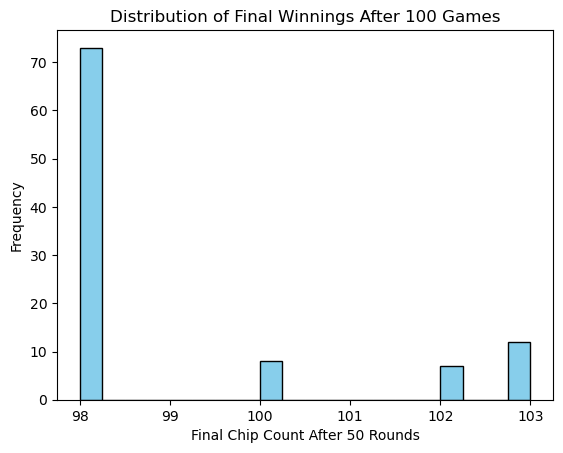

Average Winnings: 99.04
Standard Deviation: 1.8325937902328495
Probability of Net Winning: 19.00%
Probability of Net Losing: 73.00%


In [344]:
winnings = np.array(winnings)
plt.hist(winnings, bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Final Chip Count After 50 Rounds")
plt.ylabel("Frequency")
plt.title("Distribution of Final Winnings After 100 Games")
plt.show()

avg_winnings = np.mean(winnings)
std_dev = np.std(winnings)
prob_winning = np.sum(winnings > 100) / len(winnings)  
prob_losing = np.sum(winnings < 100) / len(winnings) 

print(f"Average Winnings: {avg_winnings}")
print(f"Standard Deviation: {std_dev}")
print(f"Probability of Net Winning: {prob_winning:.2%}")
print(f"Probability of Net Losing: {prob_losing:.2%}")

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [347]:
thresholds = [14, 15, 16, 17, 18]
results_by_threshold = {}

for threshold in thresholds:
    winnings = []
    
    for i in range(100):
        test_game = Game()
        test_game.add_player(count_cards("Card Counter", 100)) 
        test_game.add_player(play_like_the_dealer("Guy", 100, threshold))
        test_game.play_game(n_rounds)

        final_chips = test_game.get_players()[0].chips()
        winnings.append(final_chips)

    avg_winnings = np.mean(winnings)
    results_by_threshold[threshold] = avg_winnings
    print(f"Threshold: {threshold}, Avg Winnings: {avg_winnings}")


n players, n all players 3 3
Starting Hand: 0 / 50
n players, n all players 3 3
Starting Hand: 1 / 50
n players, n all players 3 3
Starting Hand: 2 / 50
n players, n all players 3 3
Starting Hand: 3 / 50
n players, n all players 3 3
Starting Hand: 4 / 50
n players, n all players 3 3
Starting Hand: 5 / 50
n players, n all players 3 3
Starting Hand: 6 / 50
n players, n all players 3 3
Starting Hand: 7 / 50
n players, n all players 3 3
Starting Hand: 8 / 50
n players, n all players 3 3
Starting Hand: 9 / 50
n players, n all players 3 3
Starting Hand: 10 / 50
n players, n all players 3 3
Starting Hand: 11 / 50
n players, n all players 3 3
Starting Hand: 12 / 50
n players, n all players 3 3
Starting Hand: 13 / 50
n players, n all players 3 3
Starting Hand: 14 / 50
n players, n all players 3 3
Starting Hand: 15 / 50
n players, n all players 3 3
Starting Hand: 16 / 50
n players, n all players 3 3
Starting Hand: 17 / 50
n players, n all players 3 3
Starting Hand: 18 / 50
n players, n all playe

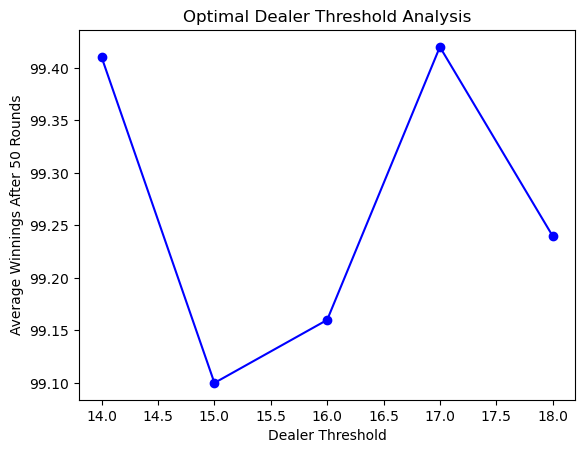

In [351]:

plt.plot(thresholds, list(results_by_threshold.values()), marker='o', color='blue')
plt.xlabel("Dealer Threshold")
plt.ylabel("Average Winnings After 50 Rounds")
plt.title("Optimal Dealer Threshold Analysis")
plt.show()

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [353]:
class double_down(Player):
    def play_hand(self, down_card, up_card, seen_cards):
        hand_value = hand_value_calc([down_card] + up_card)

        if hand_value in [10, 11]:
            self.message(self.DEBUG, f"Double Down on {hand_value}!")
            self.pay_up(2)  
            return True
        elif hand_value < 17:
            self.message(self.DEBUG, "Hitting because value < 17")
            return True
        else:
            self.message(self.DEBUG, "Staying because value >= 17")
            return False

In [357]:
winnings_double_down = []

for i in range(100):
    test_game = Game()
    test_game.add_player(double_down("Double Down", 100))
    test_game.add_player(play_like_the_dealer("Guy", 100, 16))
    test_game.play_game(n_rounds)

    final_chips = test_game.get_players()[0].chips()
    winnings_double_down.append(final_chips)


n players, n all players 3 3
Starting Hand: 0 / 50
n players, n all players 3 3
Starting Hand: 1 / 50
n players, n all players 3 3
Starting Hand: 2 / 50
n players, n all players 3 3
Starting Hand: 3 / 50
n players, n all players 3 3
Starting Hand: 4 / 50
n players, n all players 3 3
Starting Hand: 5 / 50
n players, n all players 3 3
Starting Hand: 6 / 50
n players, n all players 3 3
Starting Hand: 7 / 50
n players, n all players 3 3
Starting Hand: 8 / 50
n players, n all players 3 3
Starting Hand: 9 / 50
n players, n all players 3 3
Starting Hand: 10 / 50
n players, n all players 3 3
Starting Hand: 11 / 50
n players, n all players 3 3
Starting Hand: 12 / 50
n players, n all players 3 3
Starting Hand: 13 / 50
n players, n all players 3 3
Starting Hand: 14 / 50
n players, n all players 3 3
Starting Hand: 15 / 50
n players, n all players 3 3
Starting Hand: 16 / 50
n players, n all players 3 3
Starting Hand: 17 / 50
n players, n all players 3 3
Starting Hand: 18 / 50
n players, n all playe

In [361]:
avg_winnings_dd = np.mean(winnings_double_down)
print(f"Average Winnings with Double Down Strategy: {avg_winnings_dd}")

Average Winnings with Double Down Strategy: 99.8
